This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Now,we have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [22]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#reading a dataset
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here,we got dependent variable as "Loan_status" column which consists of "Y" or "N" values.

In [24]:
#to check how many rows and columns in dataframe
df.shape

(614, 13)

This dataset has 614 records with 13 columns

In [25]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [26]:
df.duplicated().sum()  #to check with duplicate records

0

In [27]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

there are more records on "Y"

In [28]:
#to get statistics information
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [30]:
#to check whether any null values present in dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Clearly there are many missing values in dataset

In [31]:
#So,we can impute missing categorical values with mode(most frequent value)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [32]:
#also we can impute missing continuous values with mean(Average of all values)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So,there are no null values in it.

In [36]:
#now,we can drop "Loan_ID" column which consists of unique values for all records.

df.drop(["Loan_ID"],axis=1,inplace=True)

In [37]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Visualization

Text(0.5, 1.0, 'histogram of Loan_Status')

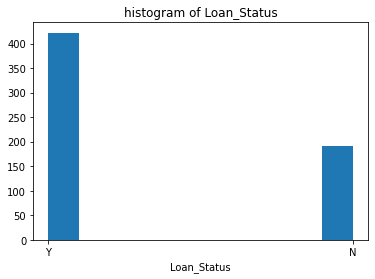

In [38]:
#visualize the histogram of Loan_Status

plt.hist(df['Loan_Status'])
plt.xlabel('Loan_Status')
plt.title('histogram of Loan_Status')

we can clearly see that "Y" values are more occuring then "N" values. SO,we can deal with this kind of imbalanced data by using a F1-score as our metrics evaluation method while training the model

In [61]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

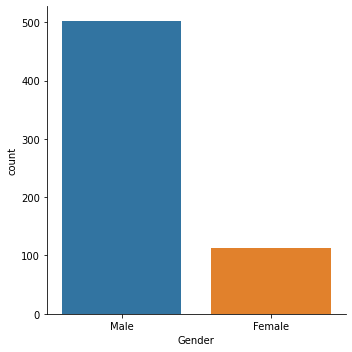

In [41]:
sns.factorplot('Gender', data=df, kind="count") ## Let's check Gender

clearly there are more records based of male person compared to female

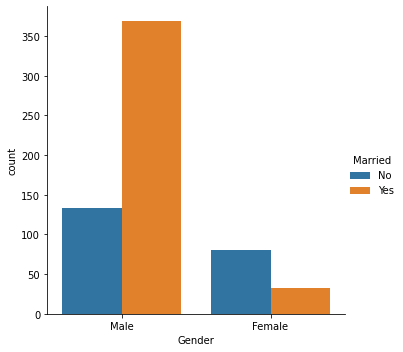

In [44]:
# Now let's seperate the genders by MaritalStatus  using 'hue' arguement 

sns.factorplot('Gender', data=df, kind="count", hue='Married')

with above observation,in case of male most of are married wheras in female case most of them were unmarried.

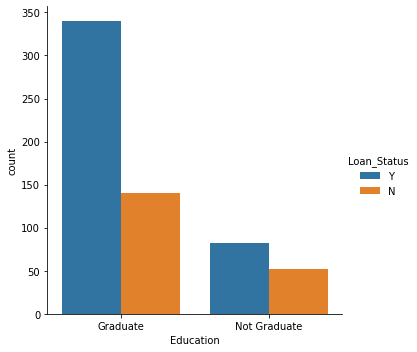

In [47]:

sns.factorplot('Education', data=df, kind="count", hue='Loan_Status')

So,most of them who are graduated gone for loan approval.

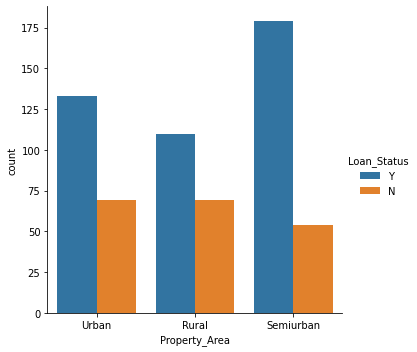

In [48]:
sns.factorplot('Property_Area', data=df, kind="count", hue='Loan_Status')

so,those who are living in Semiurban went for Loan.

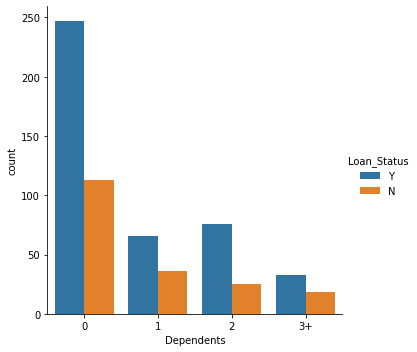

In [54]:
sns.factorplot('Dependents', data=df, kind="count", hue='Loan_Status')

mostly who don't have any dependent went for Loan.

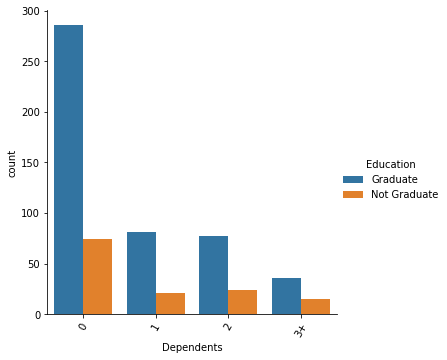

In [59]:
a = sns.factorplot('Dependents', data=df, kind="count", hue='Education')
a.set_xticklabels(rotation=60)

So,mostly those who have no dependent are graduated.

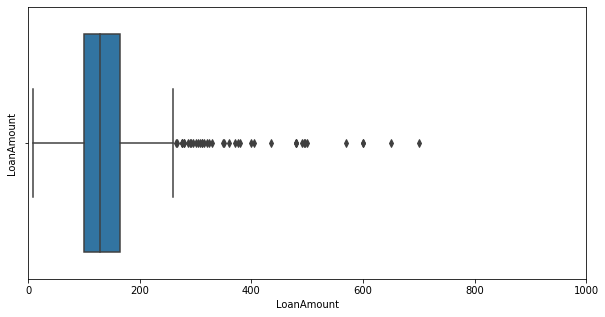

In [62]:
plt.figure(figsize=(10,5))
plt.xlim(0,1000)
plt.ylabel('LoanAmount')
sns.boxplot(x=df['LoanAmount'])
plt.show()

So,most of them went to get loan amount between 100 to 160

In [64]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

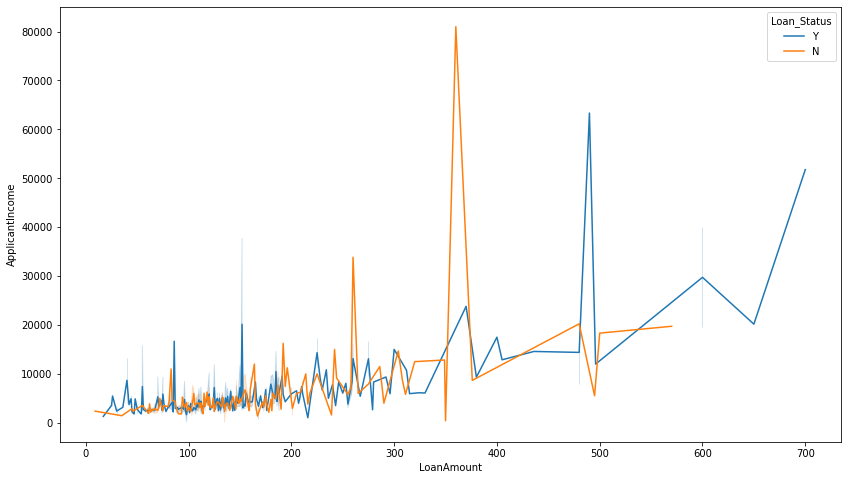

In [66]:
#checking with loan status based on income and loan amount
plt.figure(figsize=(14,8))
sns.lineplot(x="LoanAmount", y="ApplicantIncome", hue='Loan_Status', data=df)
plt.show()

So,the person who is asking loan for between 340 to 370 and havng above 60000 of income got response as "N" for thier loan_status

In [70]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Married'] = LabelEncoder().fit_transform(df['Married'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Self_Employed'] = LabelEncoder().fit_transform(df['Self_Employed'])
df['Property_Area'] = LabelEncoder().fit_transform(df['Property_Area'])

df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])
df['Credit_History'] = LabelEncoder().fit_transform(df['Credit_History'])


In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


## Correlation

In [72]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


In [73]:
#with target variable
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

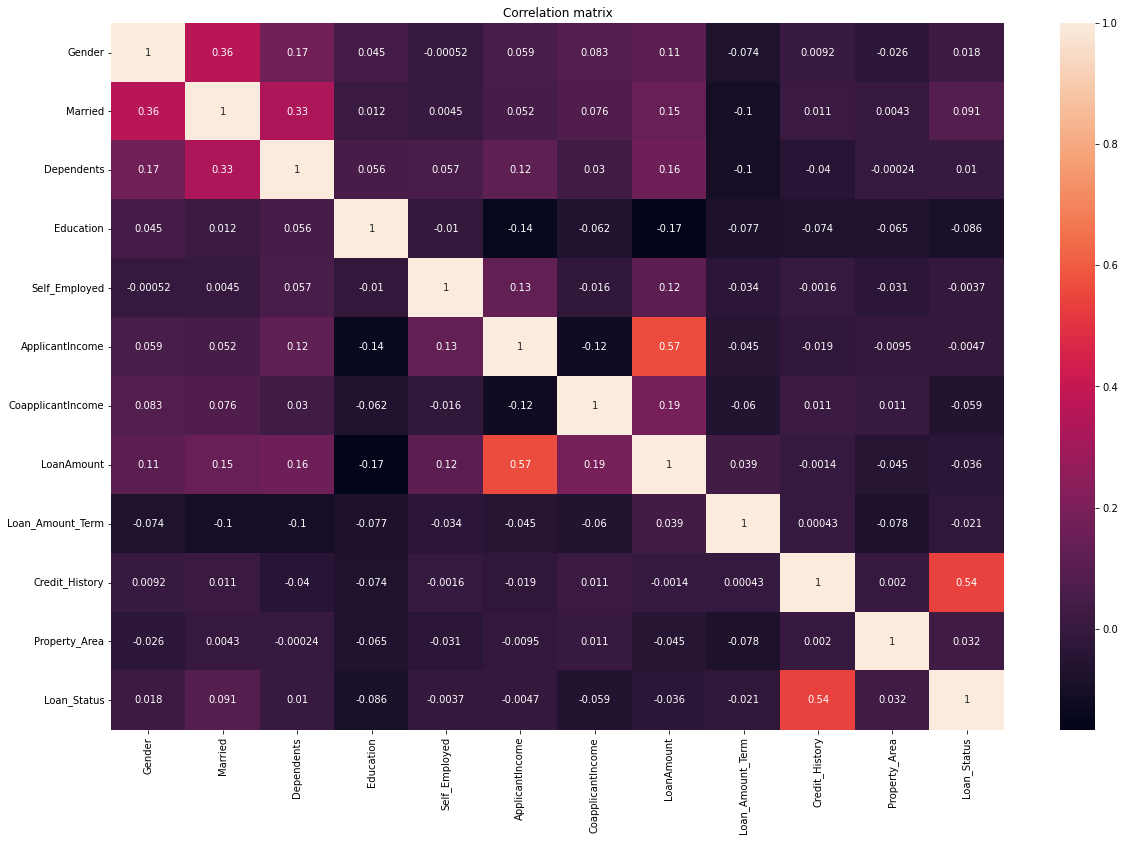

In [74]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[20,13])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,there are both positive and negativs correlations with target variable,
#### 1) only Credit_History has good correlation(54%) with target variable and rest all columns have a less correlation(<=10%) with target variable.

## Checking with outliers

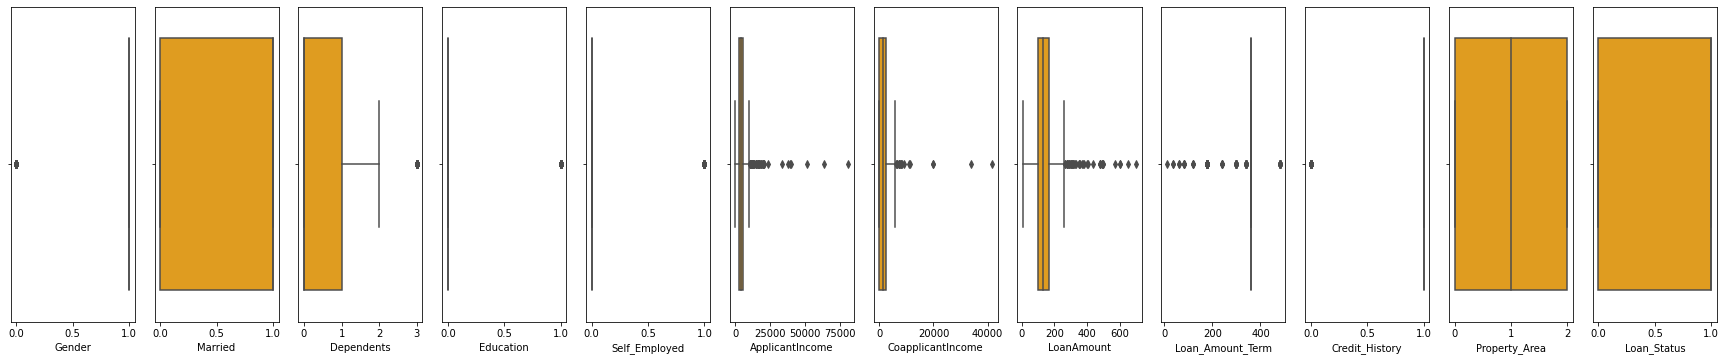

In [75]:
column_list = df.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,there are outliers present in columns like "ApplicantIncome","CoapplicantIncome","Loan_Amount_Term" and "LoanAmount"

## checking with Skewness

In [76]:
df.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

So,there is more skewness in "CoapplicantIncome" and "ApplicantIncome" compared to other columns.

## Removing the outliers

In [77]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(614, 12)

In [78]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(614, 12)
(577, 12)
37


## calcuating the percentage of data loss

In [79]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:6.03%


there is a 6.03% data loss which is good to proceed for further.

## Dividing the data into features and vectors

In [81]:
y = df_new[["Loan_Status"]]
x = df_new.drop(["Loan_Status"],axis=1)

## Checking with multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [83]:
calc_vif_value(x)

,variables,VIF
0,Gender,6.203820
1,Married,3.797198
2,Dependents,1.784757
3,Education,1.322720
4,Self_Employed,1.226922
5,ApplicantIncome,5.477211
6,CoapplicantIncome,2.493247
7,LoanAmount,11.377859
8,Loan_Amount_Term,13.269711
9,Credit_History,6.324759


## Reducing the multicollinearity

In [85]:
x["Loan_Amount_Term_LoanAmount"] = df.apply(lambda x_1: x_1['Loan_Amount_Term'] - x_1['LoanAmount'],axis=1)

In [86]:
x= x.drop(["Loan_Amount_Term","LoanAmount"],axis=1)

In [87]:
calc_vif_value(x)

,variables,VIF
0,Gender,5.963215
1,Married,3.784897
2,Dependents,1.762850
3,Education,1.320969
4,Self_Employed,1.226810
5,ApplicantIncome,3.400127
6,CoapplicantIncome,1.923465
7,Credit_History,5.957809
8,Property_Area,2.575284
9,Loan_Amount_Term_LoanAmount,5.353651


Now,its much better with the previous values

## Transforming data to eliminate skewness

In [88]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 0.47713685, -1.36251079, -0.80924269, -0.54196123, -0.38058018,
         0.68177996, -1.12244561,  0.41851254,  1.19480641, -0.03335237],
       [ 0.47713685,  0.73393914,  0.90286851, -0.54196123, -0.38058018,
         0.23478308,  0.74411669,  0.41851254, -1.34019905,  0.23579775],
       [ 0.47713685,  0.73393914, -0.80924269, -0.54196123,  2.62756724,
        -0.5272005 , -1.12244561,  0.41851254,  1.19480641,  1.1833118 ],
       [ 0.47713685,  0.73393914, -0.80924269,  1.84515044, -0.38058018,
        -0.79197189,  0.89578634,  0.41851254,  1.19480641,  0.35458205],
       [ 0.47713685, -1.36251079, -0.80924269, -0.54196123, -0.38058018,
         0.72884778, -1.12244561,  0.41851254,  1.19480641,  0.04513646]])

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 0.47713685, -1.36251079, -0.80924269, -0.54196123, -0.38058018,
         0.68177996, -1.12244561,  0.41851254,  1.19480641, -0.03335237],
       [ 0.47713685,  0.73393914,  0.90286851, -0.54196123, -0.38058018,
         0.23478308,  0.74411669,  0.41851254, -1.34019905,  0.23579775],
       [ 0.47713685,  0.73393914, -0.80924269, -0.54196123,  2.62756724,
        -0.5272005 , -1.12244561,  0.41851254,  1.19480641,  1.1833118 ],
       [ 0.47713685,  0.73393914, -0.80924269,  1.84515044, -0.38058018,
        -0.79197189,  0.89578634,  0.41851254,  1.19480641,  0.35458205],
       [ 0.47713685, -1.36251079, -0.80924269, -0.54196123, -0.38058018,
         0.72884778, -1.12244561,  0.41851254,  1.19480641,  0.04513646]])

In [91]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0   -1.622920
1   -0.630211
2    0.478360
3    1.306588
4    2.252848
5    0.027981
6   -0.191876
7   -1.976043
8   -0.155094
9   -0.426546
dtype: float64

Its much better with skewness values compared to previous values

## Selecting a best random state

In [92]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.9051724137931034  on Random state  12


In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 12)

In [94]:
print(x_train.shape,y_train.shape)

(461, 10) (461, 1)


In [95]:
print(x_test.shape,y_test.shape)

(116, 10) (116, 1)


In [96]:
# To predict the Loan_status,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.905
f1_score is 0.941
[[17 10]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116



In [97]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.759
f1_score is 0.825
[[22  5]
 [23 66]]
              precision    recall  f1-score   support

           0       0.49      0.81      0.61        27
           1       0.93      0.74      0.82        89

    accuracy                           0.76       116
   macro avg       0.71      0.78      0.72       116
weighted avg       0.83      0.76      0.78       116



In [98]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.853
f1_score is 0.906
[[17 10]
 [ 7 82]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.89      0.92      0.91        89

    accuracy                           0.85       116
   macro avg       0.80      0.78      0.79       116
weighted avg       0.85      0.85      0.85       116



In [99]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.853
f1_score is 0.905
[[18  9]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        27
           1       0.90      0.91      0.91        89

    accuracy                           0.85       116
   macro avg       0.80      0.79      0.79       116
weighted avg       0.85      0.85      0.85       116



f1_score and accuracy is high for logistic regression model

## Cross Validation to check with overfitting

In [100]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.8180809595202397


In [101]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.7834482758620689


In [102]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.7176311844077962


In [103]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.7955472263868065


here also,the CV score is more for Logstic regression model. So, I will take my final model as logistic regression model

## Hyper parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

params_list = {'penalty':['l1','l2','elasticnet','none'],
               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
               'multi_class':['auto','ovr','multinomial'],
               'C':[100, 10, 1.0, 0.1, 0.01]
               }
GCV = GridSearchCV(LogisticRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'C': 0.1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [109]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
print("accuarcy_score is",accuracy_score(y_test,GCV_predic))
print("f1_score is",f1_score(y_test,GCV_predic))

accuarcy_score is 0.9051724137931034
f1_score is 0.9411764705882354


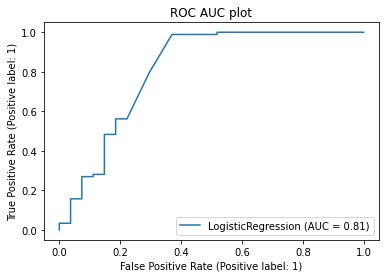

In [111]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 81%

In [112]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan_Application_Status_Prediction.pkl")

['Loan_Application_Status_Prediction.pkl']